In [1]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
# from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
!dir

 Volume in drive D is DATA
 Volume Serial Number is 1CA0-DCC7

 Directory of D:\WORKSPACE\HACK_PROJECT

09-02-2020  12:33 AM    <DIR>          .
09-02-2020  12:33 AM    <DIR>          ..
05-02-2020  02:02 PM    <DIR>          .ipynb_checkpoints
06-02-2020  11:54 PM    <DIR>          datasets
09-02-2020  12:33 AM         2,010,220 EDA_Complete.ipynb
09-02-2020  12:31 AM       835,257,393 eda_flights.csv
05-01-2020  03:51 PM           814,752 Exploratory Data Analysis for Flights Arrival and Departure Dataset.ipynb
05-01-2020  03:34 PM           113,844 Exploratory Data Analysis Of Airlines Dataset.ipynb
07-02-2020  01:52 AM       917,166,702 flights_changed_times.csv
06-02-2020  09:20 PM        82,536,473 How to make a map in python using basemap.mp4
04-01-2020  08:35 PM            35,823 LICENSE
29-12-2019  10:28 PM    <DIR>          py_env
04-01-2020  08:35 PM               115 README.md
08-02-2020  06:13 PM       930,652,033 updated_flights.csv
               9 File(s)  2,768,587,355

In [6]:
df = pd.read_csv('datasets/flights.csv', low_memory=False)
print('Dataframe dimensions', df.shape)

Dataframe dimensions (5819079, 31)


In [7]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,2355.0,-4.0,22.0,17.0,320.0,298.0,272.0,2611,749.0,4.0,819,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,2355.0,-4.0,17.0,12.0,227.0,215.0,195.0,1617,427.0,3.0,446,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,2350.0,-9.0,17.0,7.0,221.0,222.0,197.0,1598,424.0,8.0,440,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,2353.0,-6.0,10.0,3.0,161.0,157.0,144.0,1189,327.0,3.0,340,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum() / df.shape[0] * 100)).T.rename(index={0: 'null values (%)'})

In [9]:
tab_info

,column type,null values (nb),YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
null values (%),NaN,NaN,0,0,0,0,0,0,0.252978,0,0,0,1.48053,1.48053,1.53026,1.53026,0.000103109,1.80563,1.80563,0,1.58982,1.58982,0,1.58982,1.80563,0,0,98.4554,81.725,81.725,81.725,81.725,81.725
AIRLINE,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIRLINE_DELAY,float64,4755640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR_SYSTEM_DELAY,float64,4755640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AIR_TIME,float64,105071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARRIVAL_DELAY,float64,105071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ARRIVAL_TIME,float64,92513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANCELLATION_REASON,object,5729195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CANCELLED,int64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,int64,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
airports = pd.read_csv('datasets/airports.csv')

In [11]:
flights = df

In [21]:
flights.head(50)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [16]:
# count the number of flights
count_flights = flights['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(11, 11))

# define the colors 
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange']

# define size limits
size_limits = [1, 100, 1000, 10000, 100000, 1000000]

labels = []

for i in range(len(size_limits) - 1):
    labels.append("{} <.< {}".format(size_limits[i], size_limits[i + 1]))

print(labels)

['1 <.< 100', '100 <.< 1000', '1000 <.< 10000', '10000 <.< 100000', '100000 <.< 1000000']


<Figure size 792x792 with 0 Axes>

In [ ]:
# creating the map
map_ = Basemap(resolution='i', llcrnrlon=-180, urcrnrlon=-50,
              llcrnrlat=10, urcrnrlat=75, lat_0=0, lon_0=0)
map_.shadedrelief()
map_.drawcoastlines()
map_.drawcountries(linewidth=3)
map_.drawstates(color='0.3')

for index, (code, y, x) in airports[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].iterrows():
    x, y = map_(x, y)
    isize = [i for i, val in enumerate(size_limits) if val < count_flights[code]]
    map_.plot(x, y, marker='o', markersize=index * 1.2 + 5, markeredgewidth=1, color = colors[index], markeredgecolor='k', label=labels[index])
    
    # remove duplicate labels and set their order
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
            '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()

for key in key_order:
    new_label[key] = by_label[key]
    plt.legend(new_label.values(), new_label.keys(), loc = 1, prop={size: 11},
               title='Number of flights per year', frameon=True, framealpha=1)
    plt.show()

In [17]:
# considering only one month for initial_analysis
flights_Jan = flights[flights['MONTH'] == 1]

In [18]:
flights_Jan.shape

(469968, 31)

## Data Cleaning
___

1. Conversion of Year, Month and Day columns to a single date
2. Conversion of the departure and arrival time variables into actual datetime variables
3. Removing all the redundant columns thus found
    * scheduled departure + delay are the only necessary columns
    * scheduled arrival + delay are the only necessary columns
4. Thinking about all the other categorical variables - encoding them

In [29]:
flights['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
flights.drop(['YEAR', 'MONTH', 'DAY'], axis=1)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


In [54]:
# conversion of arrival and departure times
# function to convert 'hhmm' string to datetime.time

def string_to_time(time_string):
    if pd.isnull(time_string):
        return np.nan
    else:
        if time_string == 2400:
            time_string  = 0
        time_string = "{0:04d}".format(int(time_string))
        time_ = datetime.time(int(time_string[0:2]), int(time_string[2:4]))
        return time_

# function to combine date and time to produce a datetime.datetime

def combine_date_time(date_time):
    if pd.isnull(date_time[0] or date_time[1]):
        return np.nan
    else:
        return datetime.datetime.combine(date_time[0], date_time[1])
    
# function to combine two columns to create a datetime

def create_flight_time(df, column):
    list_ = []
    for index, columns in df[['DATE', column]].iterrows():
        if pd.isnull(columns[1]):
            return np.nan
        elif float(columns[1] == 2400):
            columns[0] += datetime.timedelta(days=1)
            columns[1] = datetime.time(0, 0)
            list_.append(combine_date_time(columns))
        else:
            columns[1] = string_to_time(columns[1])
            list_.append(combine_date_time(columns))
    return pd.Series(list_)

In [31]:
flights['SCHEDULED_DEPARTURE'] = create_flight_time(flights, 'SCHEDULED_DEPARTURE')
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(string_to_time)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(string_to_time)
flights['ARRIVAL_TIME'] =  flights['ARRIVAL_TIME'].apply(string_to_time)

flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,2015-01-01 00:25:00,00:20:00,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,06:02:00,06:10:00,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,2015-01-01 00:25:00,00:19:00,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,05:26:00,05:09:00,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,2015-01-01 00:30:00,00:44:00,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,08:03:00,07:53:00,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,2015-01-01 00:30:00,00:19:00,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,05:45:00,05:32:00,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,2015-01-01 00:30:00,00:33:00,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,07:11:00,06:56:00,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01


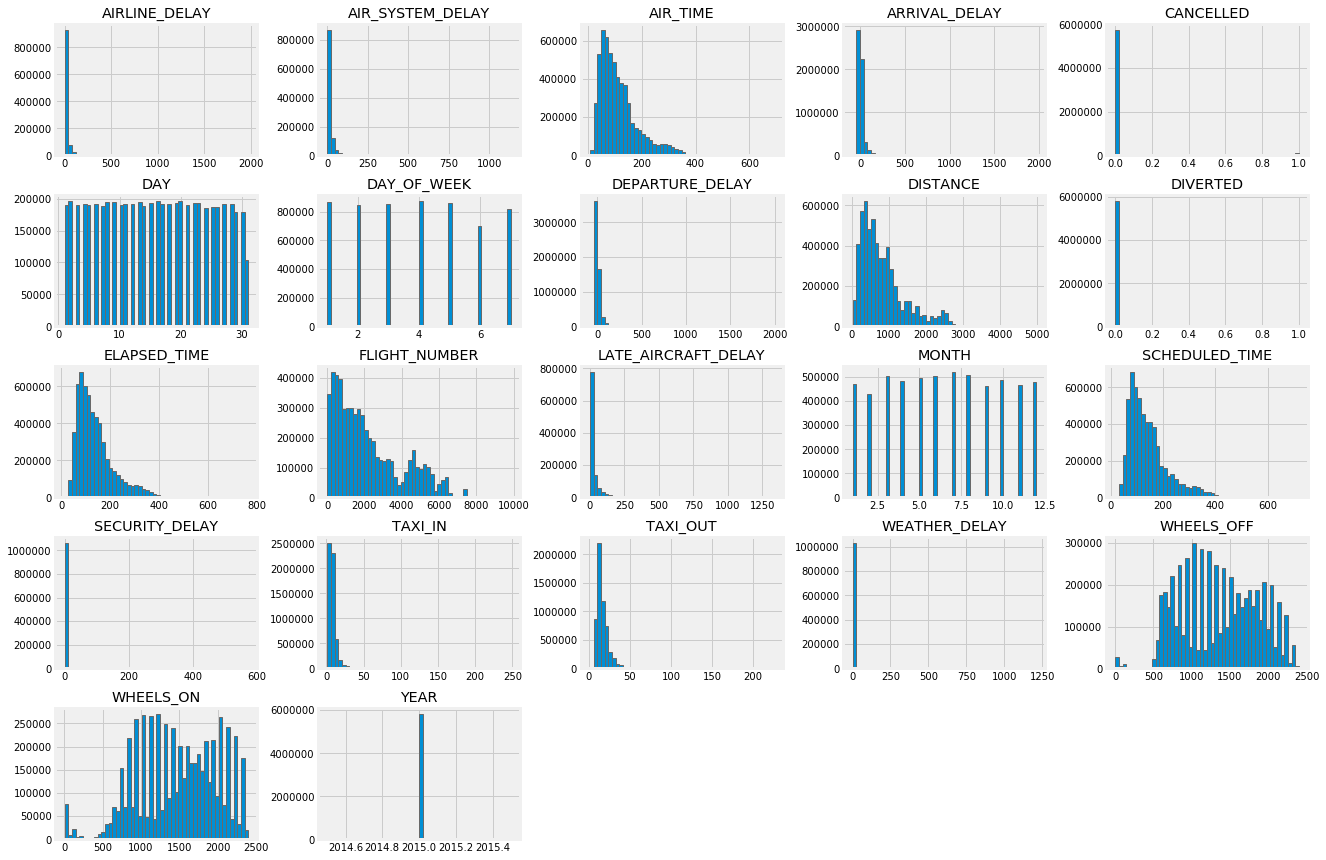

In [32]:
# since the departure time and arrival time don't provide any additional
# information, these can be considered redundant, and hence, we're not going
# to use these

# let's now make the list of variables that don't show any sort of dependency
# and remove those

# let's create a histogram for each of these variables so that their dependency 
# is shown
flights.hist(bins=50, figsize=(20, 15))
plt.show()

In [33]:
# checking how complete the dataset actually is
missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)'] = (flights.shape[0] - missing_df['missing values']) / flights.shape[0] * 100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,5729195,1.544643
1,LATE_AIRCRAFT_DELAY,4755640,18.275040
2,AIRLINE_DELAY,4755640,18.275040
3,SECURITY_DELAY,4755640,18.275040
4,AIR_SYSTEM_DELAY,4755640,18.275040
5,WEATHER_DELAY,4755640,18.275040
6,ELAPSED_TIME,105071,98.194371
7,AIR_TIME,105071,98.194371
8,ARRIVAL_DELAY,105071,98.194371
9,WHEELS_ON,92513,98.410178


In [37]:
# by checking the last completeness and dependencies of the data set we have
# reached at a point where we can remove all the redundant features
# as well as those features that don't contribute much to the model

# removing all those features with filling factors < 20% initially
low_filling_features = ['CANCELLATION_REASON', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY',
                       'SECURITY_DELAY', 'AIR_SYSTEM_DELAY', 'WEATHER_DELAY']
# weather is actually an important feature, but due to lack of data
# we're removing it

# remove low filling features
flights.drop(low_filling_features, axis=1, inplace=True)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,2015-01-01


In [38]:
flights.drop(['YEAR', 'MONTH', 'DAY'], axis=1, inplace=True)
flights.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,2015-01-01
2,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,2015-01-01


In [39]:
flights.shape

(5819079, 23)

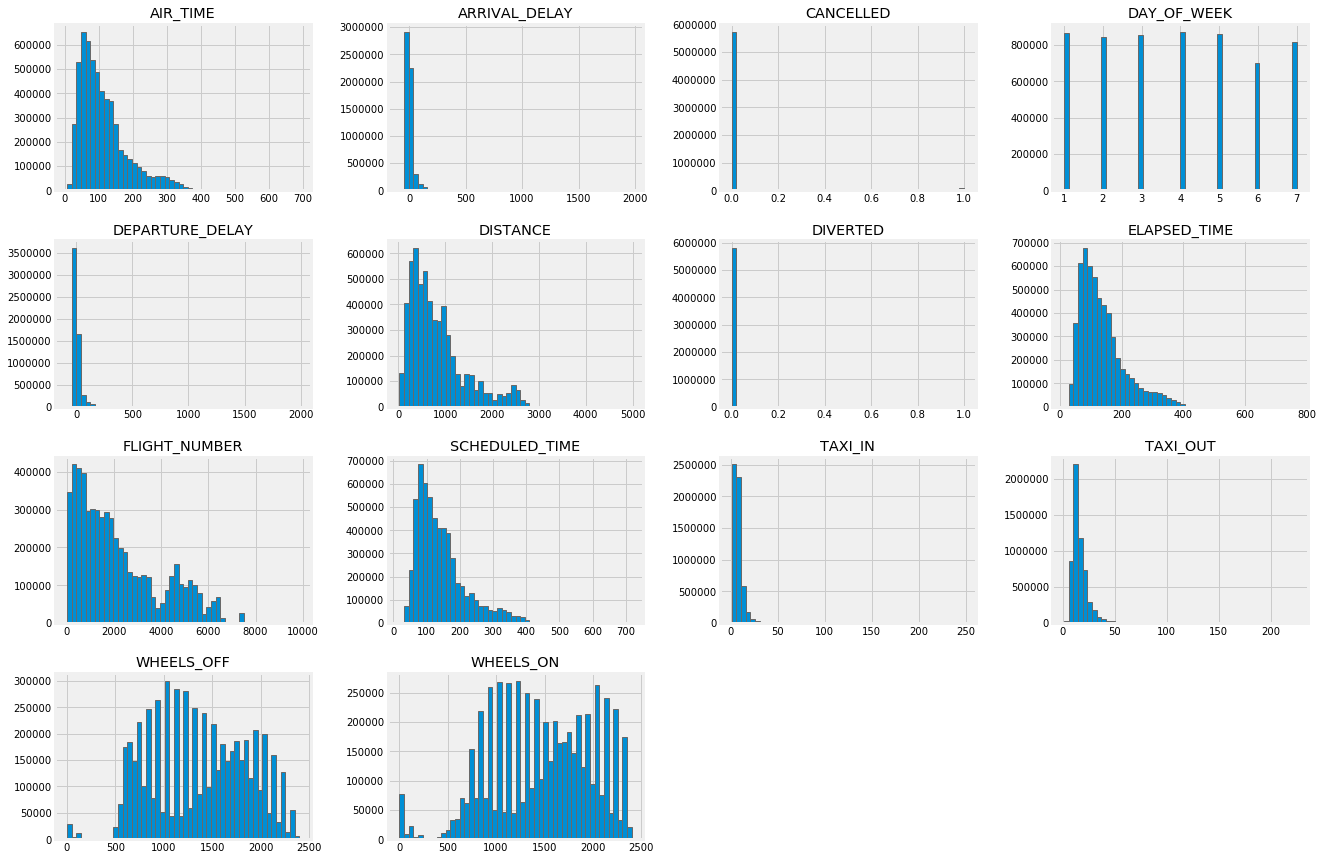

In [40]:
# now plotting the histogram
flights.hist(bins=50, figsize=(20, 15))
plt.show()

In [41]:
flights.to_csv('flights_changed_times.csv')

In [4]:
!dir

 Volume in drive D is DATA
 Volume Serial Number is 1CA0-DCC7

 Directory of D:\WORKSPACE\HACK_PROJECT

08-02-2020  02:31 PM    <DIR>          .
08-02-2020  02:31 PM    <DIR>          ..
05-02-2020  02:02 PM    <DIR>          .ipynb_checkpoints
06-02-2020  11:54 PM    <DIR>          datasets
08-02-2020  02:31 PM           431,535 EDA_Complete.ipynb
05-01-2020  03:51 PM           814,752 Exploratory Data Analysis for Flights Arrival and Departure Dataset.ipynb
05-01-2020  03:34 PM           113,844 Exploratory Data Analysis Of Airlines Dataset.ipynb
07-02-2020  01:52 AM       917,166,702 flights_changed_times.csv
06-02-2020  09:20 PM        82,536,473 How to make a map in python using basemap.mp4
04-01-2020  08:35 PM            35,823 LICENSE
29-12-2019  10:28 PM    <DIR>          py_env
04-01-2020  08:35 PM               115 README.md
               7 File(s)  1,001,099,244 bytes
               5 Dir(s)  270,069,309,440 bytes free


In [3]:
flights = pd.read_csv('flights_changed_times.csv')

In [4]:
flights.head()

,Unnamed: 0,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,0,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,2015-01-01 00:00:00
1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,2015-01-01 00:00:00
2,2,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,2015-01-01 00:00:00
3,3,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,2015-01-01 00:00:00
4,4,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,2015-01-01 00:00:00


In [5]:
date_column = flights['DATE']
flights.drop(['DATE'], axis=1, inplace=True)
flights.insert(loc=0, column='DATE', value=date_column)
flights.head()

,DATE,Unnamed: 0,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,0,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,2,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,3,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0


In [6]:
flights.shape

(5819079, 24)

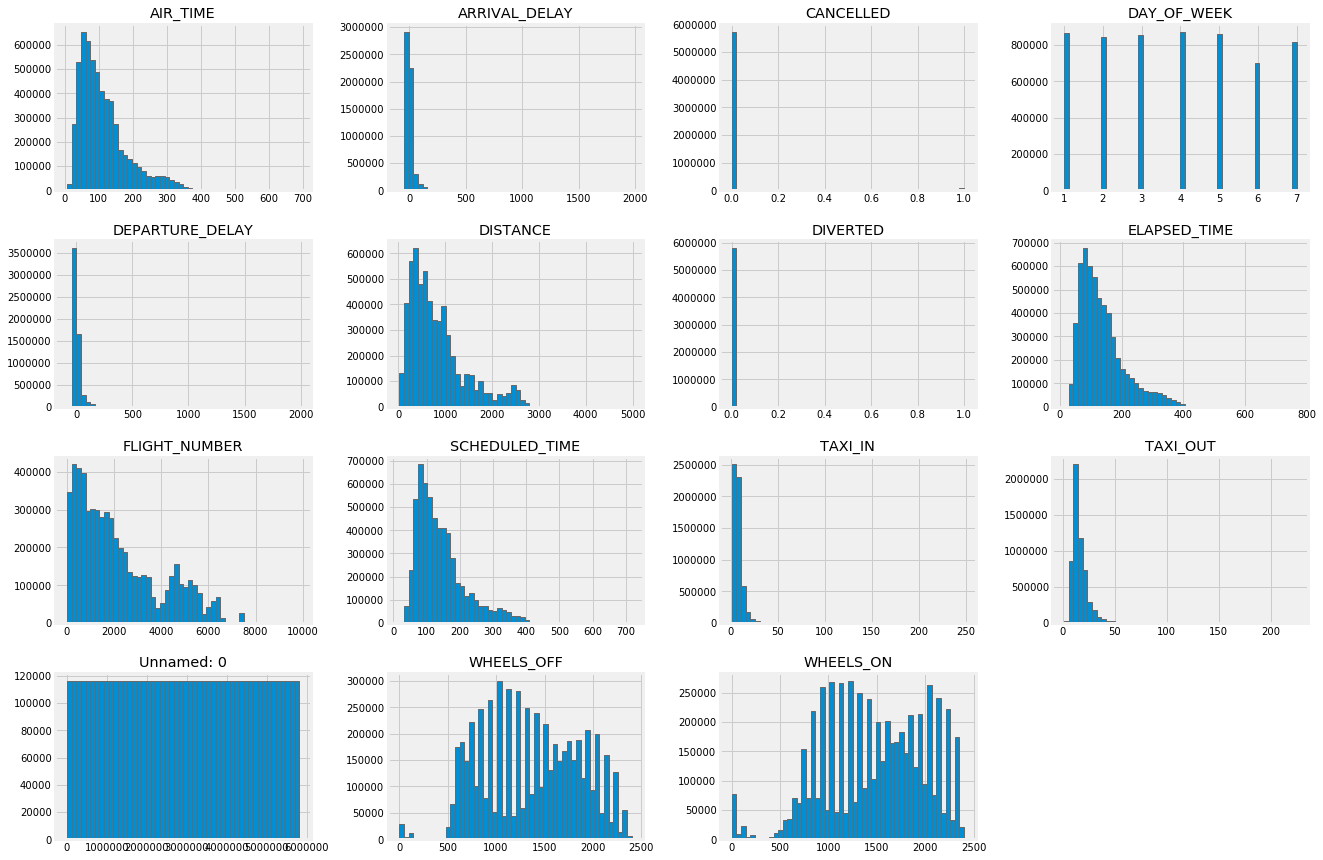

In [7]:
# since the departure time and arrival time don't provide any additional
# information, these can be considered redundant, and hence, we're not going
# to use these

# let's now make the list of variables that don't show any sort of dependency
# and remove those

# let's create a histogram for each of these variables so that their dependency 
# is shown
flights.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 24 columns):
DATE                   object
Unnamed: 0             int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
DEPARTURE_TIME         object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      object
ARRIVAL_TIME           object
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
dtypes: float64(9), int64(6), object(9)
memory usage: 1.0+ GB


In [9]:
flights.drop(['Unnamed: 0'], axis=1, inplace=True)
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0


In [10]:
# now let's do a bit of documentation
"""
  AIRLINE  - it is an object which is the airline identifier
  WHEELS_OFF - the time point at which the aircraft's wheel leaves the ground
  WHEELS_ON - the time point at which the aircraft's wheel touches the ground

  TAXI_OUT - The time duration elapsed between departure from the origin airport gate and wheels off
  TAXI_IN - The time duration elapsed between wheels-on and gate arrival at the destination airport

  AIR_TIME - The time duration between wheels off and wheels on
  ELAPSED TIME - AIR_TIME + TAXI_IN + TAXI_OUT

"""

"\n  AIRLINE  - it is an object which is the airline identifier\n  WHEELS_OFF - the time point at which the aircraft's wheel leaves the ground\n  WHEELS_ON - the time point at which the aircraft's wheel touches the ground\n\n  TAXI_OUT - The time duration elapsed between departure from the origin airport gate and wheels off\n  TAXI_IN - The time duration elapsed between wheels-on and gate arrival at the destination airport\n\n  AIR_TIME - The time duration between wheels off and wheels on\n  ELAPSED TIME - AIR_TIME + TAXI_IN + TAXI_OUT\n\n"

In [11]:
# let's clean the dataset now
# checking how complete the dataset actually is
missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)'] = (flights.shape[0] - missing_df['missing values']) / flights.shape[0] * 100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)

# now since the filling factor is quite good
# and since we can't afford to have bad data 
# let's remove all the rows with empty values

,variable,missing values,filling factor (%)
0,ARRIVAL_DELAY,105071,98.194371
1,AIR_TIME,105071,98.194371
2,ELAPSED_TIME,105071,98.194371
3,ARRIVAL_TIME,92513,98.410178
4,TAXI_IN,92513,98.410178
5,WHEELS_ON,92513,98.410178
6,WHEELS_OFF,89047,98.469741
7,TAXI_OUT,89047,98.469741
8,DEPARTURE_TIME,86153,98.519474
9,DEPARTURE_DELAY,86153,98.519474


In [12]:
flights.dropna(inplace = True)
# now let's check the filling factor
missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)'] = (flights.shape[0] - missing_df['missing values']) / flights.shape[0] * 100
missing_df.sort_values('filling factor (%)').reset_index(drop=True)

,variable,missing values,filling factor (%)
0,DATE,0,100.0
1,ARRIVAL_DELAY,0,100.0
2,ARRIVAL_TIME,0,100.0
3,SCHEDULED_ARRIVAL,0,100.0
4,TAXI_IN,0,100.0
5,WHEELS_ON,0,100.0
6,DISTANCE,0,100.0
7,AIR_TIME,0,100.0
8,ELAPSED_TIME,0,100.0
9,SCHEDULED_TIME,0,100.0


In [13]:
flights.shape

(5714008, 23)

## Inference
___

From the inference of the dataset we found that the elapsed time and air time features, are not consistent with respect to the airlines' arrival and departure. Hence, I think that the air time feature is inconsistent and hence is the elapsed time variable, hence, they either should be redefined or they should be removed altogether.

In [14]:
# let's redefine elapsed time as arrival time - departure time
# first let's drop the air time and elapsed time variables
flights.drop(['ELAPSED_TIME', 'AIR_TIME'], axis=1, inplace=True)
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0


In [15]:
# let's now redefine the new column
# making the elapsed time in minutes

# flights['ELAPSED_TIME'] = flights.apply(lambda row: (row.ARRIVAL_TIME - row.DEPARTURE_TIME).days * 24 * 60 + (row.ARRIVAL_TIME - row.DEPARTURE_TIME).seconds / 60)

# the above function apply was not working properly, so I think we have to go 
# about with the list functionality

arrival_times = flights['ARRIVAL_TIME'].tolist()
departure_times = flights['DEPARTURE_TIME'].tolist()
print(type(arrival_times[0]))
print(type(departure_times[0]))
print(len(departure_times))
print(len(arrival_times))
# flights.head()

<class 'str'>
<class 'str'>
5714008
5714008


In [16]:
elapsed_times = []

# make the large string to time conversion function
import datetime
from datetime import datetime
for a_t, d_t in zip(arrival_times, departure_times):
    a_time = datetime.strptime(str(a_t), '%H:%M:%S')
    d_time = datetime.strptime(str(d_t), '%H:%M:%S')
    if (a_time - d_time).days < 0:
        elapsed_time_in_minutes = ((a_time - d_time).days + 1)* 24 * 60 + (a_time - d_time).seconds / 60
    else:
        elapsed_time_in_minutes = ((a_time - d_time).days)* 24 * 60 + (a_time - d_time).seconds / 60
#     print(elapsed_time_in_minutes)
#     break
    elapsed_times.append(elapsed_time_in_minutes)

In [17]:
elapsed_times[:10]
print(len(elapsed_times))

5714008


In [18]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0


In [19]:
taxi_in = flights['TAXI_IN'].tolist()
taxi_out = flights['TAXI_OUT'].tolist()
type(taxi_in[0])

float

In [20]:
air_times = []
for index, et in enumerate(elapsed_times):
    air_times.append(et - taxi_in[index] - taxi_out[index])
air_times[:10]

[229.0, 443.0, 446.0, 438.0, 139.0, 326.0, 274.0, 408.0, 293.0, 366.0]

In [21]:
flights.insert(loc=15, column='ELAPSED_TIMES', value=elapsed_times)
flights.insert(loc=16, column='AIR_TIMES', value=air_times)
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,WHEELS_ON,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,1448,404.0,254.0,229.0,4.0,04:30:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,2330,737.0,459.0,443.0,4.0,07:50:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,2296,800.0,473.0,446.0,11.0,08:06:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,2342,748.0,461.0,438.0,8.0,08:05:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,1448,254.0,155.0,139.0,5.0,03:20:00,02:59:00,-21.0,0,0


In [22]:
# convert wheels off and wheels on to times
# def conv_string(val):
#     val_ = str(int(val))
#     return val_
# flights['WHEELS_OFF'] = flights['WHEELS_OFF'].apply(conv_string).apply(string_to_time)
# flights['WHEELS_ON'] = flights['WHEELS_ON'].apply(conv_string).apply(string_to_time)

wheels_off = flights['WHEELS_OFF'].tolist()
wheels_on = flights['WHEELS_ON'].tolist()
won, woff = [], []
for w_on, w_off in zip(wheels_on, wheels_off):
    w_on, w_off = str(int(w_on)), str(int(w_off))
    if len(w_on) == 1:
        w_on = '0' + w_on
    if len(w_off) == 1:
        w_off = '0' + w_off
    if len(w_on) == 2:
        w_on = '0' + w_on
    if len(w_off) == 2:
        w_off = '0' + w_off
    if len(w_on) == 3:
        w_on = '0' + w_on
    if len(w_off) == 3:
        w_off = '0' + w_off
    
    won.append(w_on)
    woff.append(w_off)

# flights.head()
woff[:10]

['0015',
 '0014',
 '0034',
 '0030',
 '0035',
 '0038',
 '0030',
 '0057',
 '0036',
 '0045']

In [23]:
won[1000:1030]

['0833',
 '0914',
 '1225',
 '0809',
 '0952',
 '0919',
 '1046',
 '1506',
 '0945',
 '0959',
 '1037',
 '0908',
 '1158',
 '1026',
 '1228',
 '1037',
 '0910',
 '1006',
 '0911',
 '0929',
 '1151',
 '0957',
 '0832',
 '1317',
 '1455',
 '0919',
 '0825',
 '0953',
 '1337',
 '0913']

In [24]:
flights.drop(['WHEELS_ON', 'WHEELS_OFF'], axis=1, inplace=True)
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,1448,254.0,229.0,4.0,04:30:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,2330,459.0,443.0,4.0,07:50:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,2296,473.0,446.0,11.0,08:06:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,2342,461.0,438.0,8.0,08:05:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,1448,155.0,139.0,5.0,03:20:00,02:59:00,-21.0,0,0


In [81]:
flights.insert(loc = 12, column='WHEELS_OFF', value=woff)
flights.insert(loc = 18, column='WHEELS_ON', value=won)

In [25]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,1448,254.0,229.0,4.0,04:30:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,2330,459.0,443.0,4.0,07:50:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,2296,473.0,446.0,11.0,08:06:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,2342,461.0,438.0,8.0,08:05:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,1448,155.0,139.0,5.0,03:20:00,02:59:00,-21.0,0,0


In [26]:
# now convert wheels off and wheels on to time
# def string_to_time(time_string):
#     if pd.isnull(time_string):
#         return np.nan
#     else:
#         if time_string == 2400:
#             time_string  = 0
#         time_string = "{0:04d}".format(int(time_string))
#         time_ = datetime.time(int(time_string[0:2]), int(time_string[2:4]))
#         return time_
def str_time(string_time):
    if pd.isnull(string_time):
        return np.nan
    else:
        if string_time == '2400':
            string_time = '0000'
            
        
        time_ = datetime.strptime(string_time, "%H%M")
        return time_.time()

won_times , woff_times = [], []
for on, off in zip(won, woff):
    on_time = str_time(on)
    off_time = str_time(off)
    won_times.append(on_time)
    woff_times.append(off_time)

# flights['WHEELS_OFF'] = flights['WHEELS_OFF'].apply(str_time)
# flights['WHEELS_ON'] = flights['WHEELS_ON'].apply(str_time)
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,1448,254.0,229.0,4.0,04:30:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,2330,459.0,443.0,4.0,07:50:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,2296,473.0,446.0,11.0,08:06:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,2342,461.0,438.0,8.0,08:05:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,1448,155.0,139.0,5.0,03:20:00,02:59:00,-21.0,0,0


In [27]:
flights.insert(loc = 12, column='WHEELS_OFF', value=woff_times)
flights.insert(loc = 18, column='WHEELS_ON', value=won_times)

In [28]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0,0,0


In [33]:
flights.to_csv('updated_flights.csv')

In [4]:
flights = pd.read_csv('updated_flights.csv')
flights.head()

,Unnamed: 0,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0,0,0
1,1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0,0,0
2,2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0,0,0
3,3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0,0,0
4,4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0,0,0


## Comparing the airlines
___

In [29]:
airlines_names = pd.read_csv('datasets/airlines.csv')
airlines_names

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [30]:
abbreviations_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [31]:
abbreviations_companies

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [32]:
# considering all the flights from all the carriers
# classify airlines with respect to their punctuality

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
global_stats = flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
VX,-24.0,644.0,61248.0,8.993486
HA,-27.0,1433.0,76041.0,0.469918
F9,-46.0,1112.0,90090.0,13.303352
NK,-37.0,836.0,115193.0,15.883101
AS,-82.0,963.0,171439.0,1.718926
US,-28.0,759.0,194223.0,6.081000
B6,-31.0,1006.0,262042.0,11.442467
MQ,-36.0,1544.0,278791.0,9.967187
UA,-40.0,1314.0,507762.0,14.333056


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


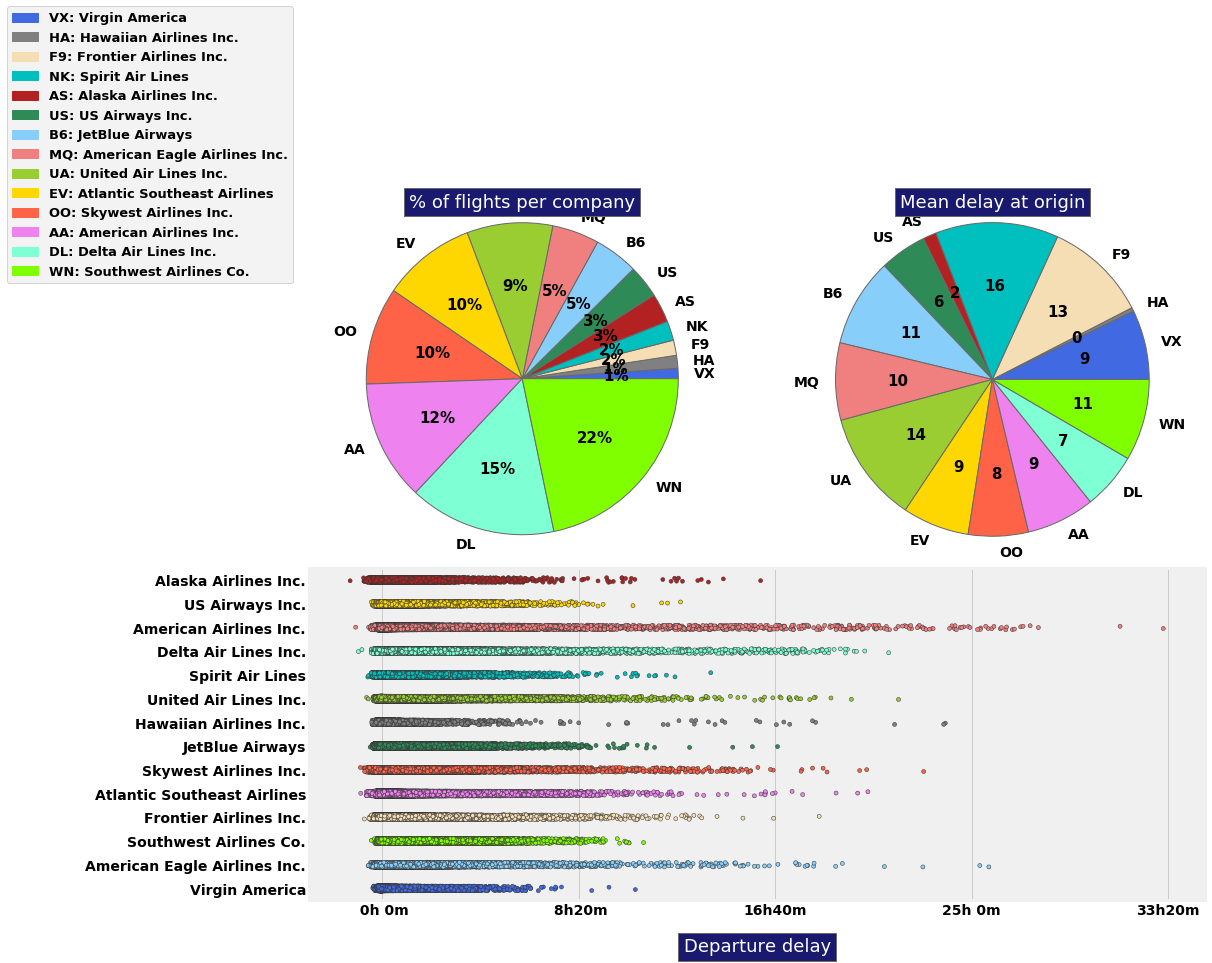

In [108]:
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = flights.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]
df2['AIRLINE'] = df2['AIRLINE'].replace(abbreviations_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbreviations_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbreviations_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbreviations_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i],
            label = global_stats.index[i] + ': ' + abbreviations_companies[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbreviations_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbreviations_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
#------------------------------------------------------
# striplot with all the values reported for the delays
#___________________________________________________________________
# I redefine the colors for correspondance with the pie charts
colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
ax3 = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


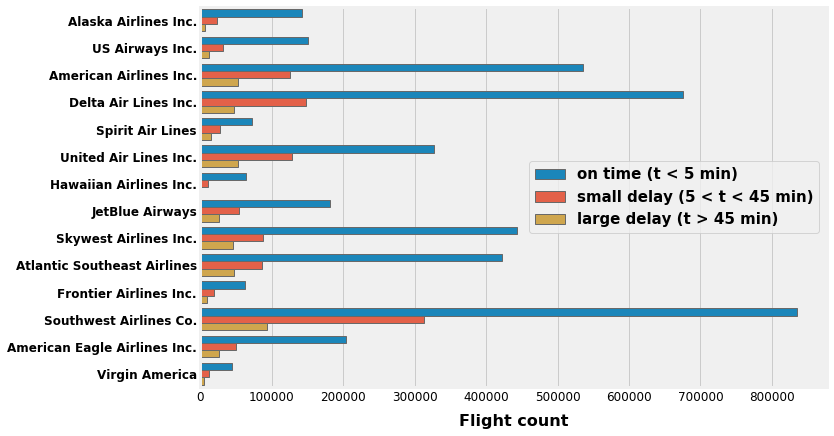

In [110]:
#_____________________________________________
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flights['DELAY_LEVEL'] = flights['DEPARTURE_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = [abbreviations_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

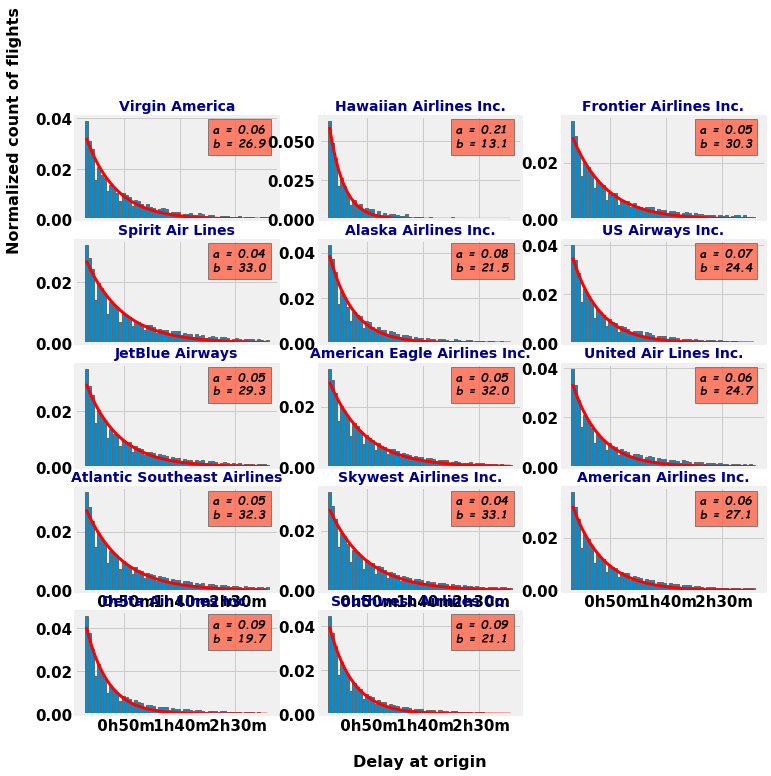

In [111]:
# delays distribution for airlines

# Model function used to fit the histograms
def func(x, a, b):
    return a * np.exp(-x/b)
#-------------------------------------------
points = [] ; label_company = []
fig = plt.figure(1, figsize=(11,11))
i = 0
for carrier_name in [abbreviations_companies[x] for x in global_stats.index]:
    i += 1
    ax = fig.add_subplot(5,3,i)    
    #_________________________
    # Fit of the distribution
    n, bins, patches = plt.hist(x = df2[df2['AIRLINE']==carrier_name]['DEPARTURE_DELAY'],
                                range = (15,180), normed=True, bins= 60)
    bin_centers = bins[:-1] + 0.5 * (bins[1:] - bins[:-1])    
    popt, pcov = curve_fit(func, bin_centers, n, p0 = [1, 2])
    #___________________________
    # bookeeping of the results
    points.append(popt)
    label_company.append(carrier_name)
    #______________________
    # draw the fit curve
    plt.plot(bin_centers, func(bin_centers, *popt), 'r-', linewidth=3)    
    #_____________________________________
    # define tick labels for each subplot
    if i < 10:
        ax.set_xticklabels(['' for x in ax.get_xticks()])
    else:
        ax.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                            for x in ax.get_xticks()])
    #______________
    # subplot title
    plt.title(carrier_name, fontsize = 14, fontweight = 'bold', color = 'darkblue')
    #____________
    # axes labels 
    if i == 4:
        ax.text(-0.3,0.9,'Normalized count of flights', fontsize=16, rotation=90,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    if i == 14:
        ax.text( 0.5, -0.5 ,'Delay at origin', fontsize=16, rotation=0,
            color='k', horizontalalignment='center', transform = ax.transAxes)
    #___________________________________________
    # Legend: values of the a and b coefficients
    ax.text(0.68, 0.7, 'a = {}\nb = {}'.format(round(popt[0],2), round(popt[1],1)),
            style='italic', transform=ax.transAxes, fontsize = 12, family='fantasy',
            bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})
    
plt.tight_layout()

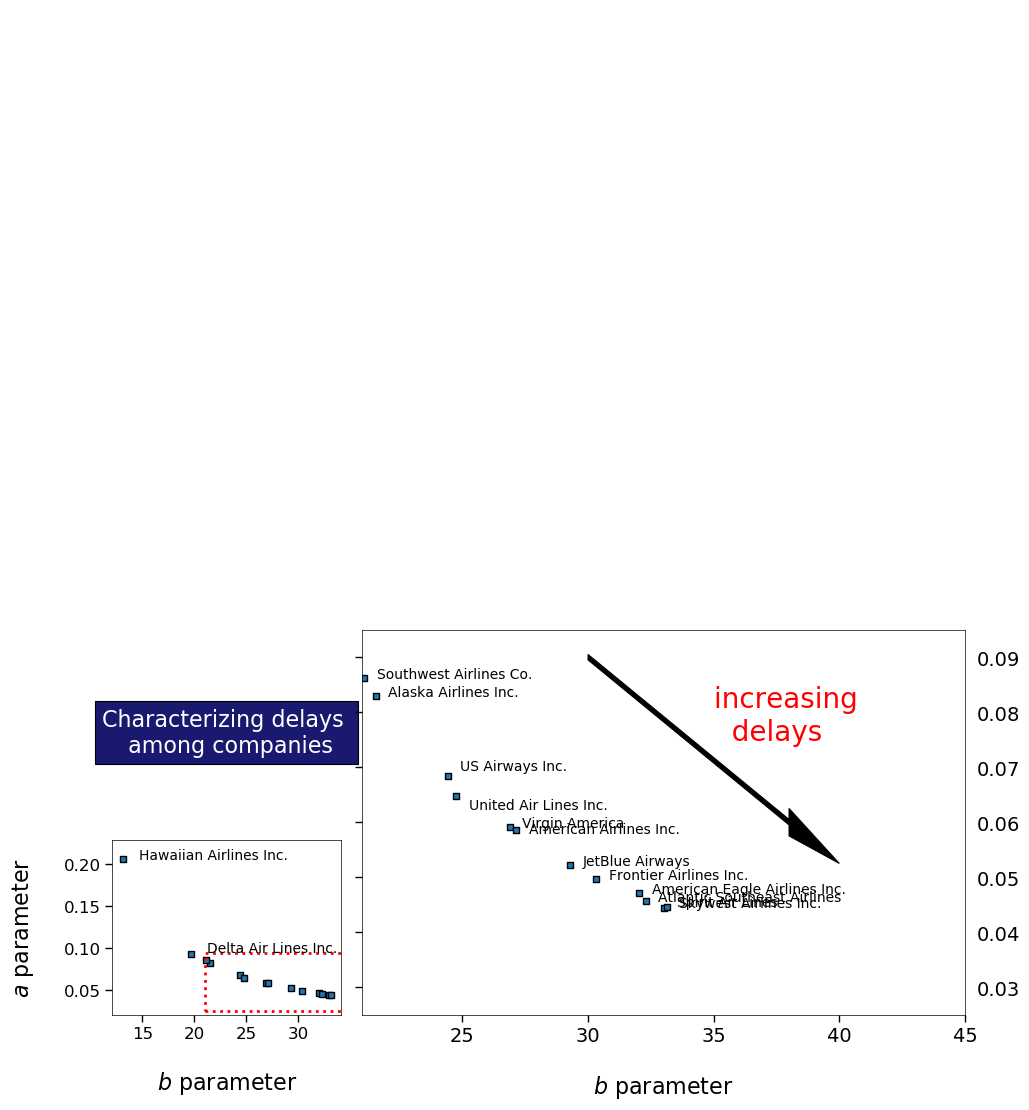

In [113]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set_context('paper')
import matplotlib.patches as patches

fig = plt.figure(1, figsize=(11,5))
y_shift = [0 for _ in range(14)]
y_shift[3] = 0.5/1000
y_shift[12] = 2.5/1000
y_shift[11] = -0.5/1000
y_shift[8] = -2.5/1000
y_shift[5] = 1/1000
x_val = [s[1] for s in points]
y_val = [s[0] for s in points]

gs=GridSpec(2,7)
#_______________________________
# 1/ Plot overview (left panel)
ax1=fig.add_subplot(gs[1,0:2]) 
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = '1')
#__________________________________
# Company label: Hawaiian airlines
i= 1
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
plt.ylabel("$a$ parameter", fontsize=16, labelpad=20)
#__________________________________
# Company label: Hawaiian airlines
i= 12
ax1.annotate(label_company[i], xy=(x_val[i]+1.5, y_val[i]+y_shift[i]),
             xycoords='data', fontsize = 10)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
plt.ylabel("$a$ parameter", fontsize=16, labelpad=20)
#____________
# Main Title
ax1.text(.5,1.5,'Characterizing delays \n among companies', fontsize=16,
        bbox={'facecolor':'midnightblue', 'pad':5}, color='w',
        horizontalalignment='center',
        transform=ax1.transAxes)
#________________________
# plot border parameters
for k in ['top', 'bottom', 'right', 'left']:
    ax1.spines[k].set_visible(True)
    ax1.spines[k].set_linewidth(0.5)
    ax1.spines[k].set_color('k')
#____________________
# Create a Rectangle 
rect = patches.Rectangle((21,0.025), 19, 0.07, linewidth=2,
                         edgecolor='r', linestyle=':', facecolor='none')
ax1.add_patch(rect)
#_______________________________________________
# 2/ Zoom on the bulk of carriers (right panel)
ax2=fig.add_subplot(gs[0:2,2:])
plt.scatter(x=x_val, y=y_val, marker = 's', edgecolor='black', linewidth = '1')
plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
ax2.set_xlim(21,45)
ax2.set_ylim(0.025,0.095)
#________________
# Company labels
for i in range(len(abbreviations_companies)):
    ax2.annotate(label_company[i], xy=(x_val[i]+0.5, y_val[i]+y_shift[i]),
                 xycoords='data', fontsize = 10)
#____________________________
# Increasing delay direction
ax2.arrow(30, 0.09, 8, -0.03, head_width=0.005,
          shape = 'full', head_length=2, fc='k', ec='k')
ax2.annotate('increasing \n  delays', fontsize= 20, color = 'r',
          xy=(35, 0.075), xycoords='data')
#________________________________
# position and size of the ticks
plt.tick_params(labelleft=False, labelright=True)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
#________________________
# plot border parameters
for k in ['top', 'bottom', 'right', 'left']:
    ax2.spines[k].set_visible(True)
    ax2.spines[k].set_linewidth(0.5)
    ax2.spines[k].set_color('k')    
#________________________________
# Connection between the 2 plots
xy2 = (40, 0.09) ; xy1 = (21, 0.095)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
xy2 = (40, 0.025) ; xy1 = (21, 0.025)
con = ConnectionPatch(xyA=xy1, xyB=xy2, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1,
                      linestyle=':', linewidth = 2, color="red")
ax2.add_artist(con)
plt.xlabel("$b$ parameter", fontsize=16, labelpad=20)
#--------------------------------
plt.show()

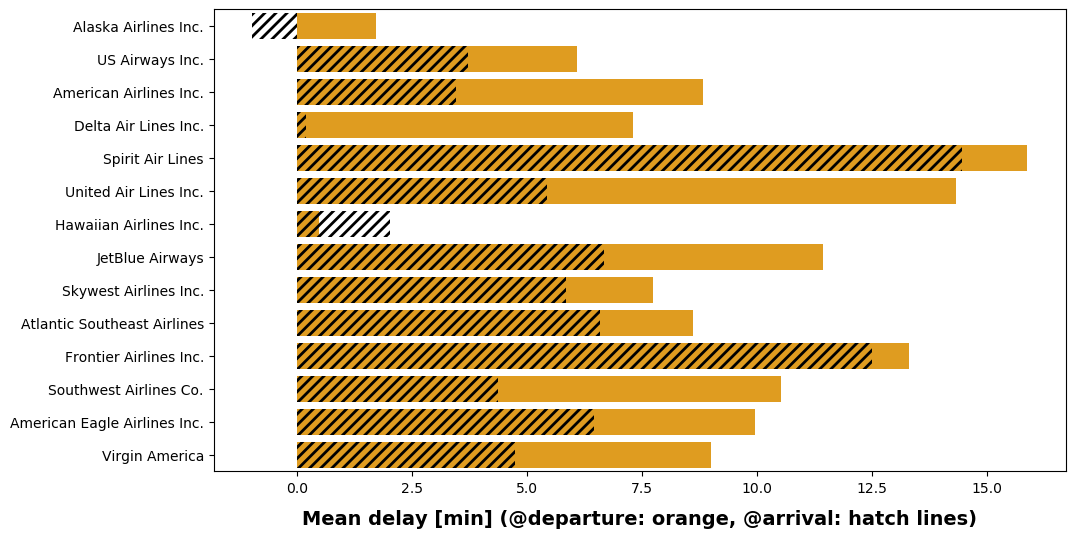

In [119]:
# do the delays occur during take off or during the landing?
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=flights, color="orange", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=flights, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
labels = [abbreviations_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: orange, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

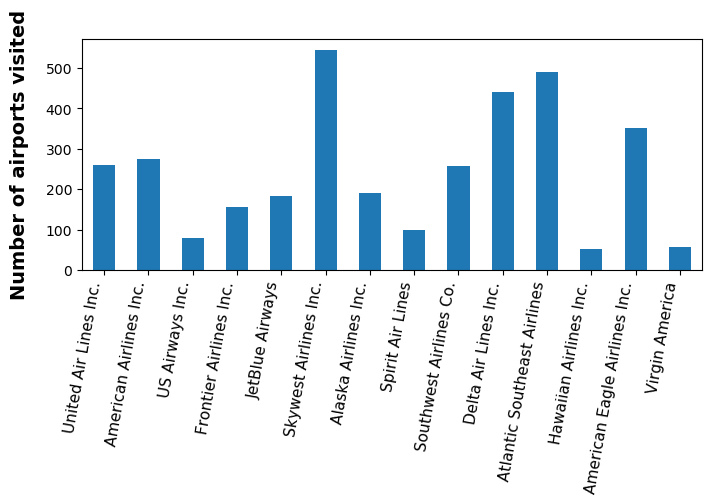

In [123]:
# finding the geographical area covered by the airlines
origin_nb = dict()
for carrier in abbreviations_companies.keys():
    liste_origin_airport = flights[flights['AIRLINE'] == carrier]['ORIGIN_AIRPORT'].unique()
    origin_nb[carrier] = len(liste_origin_airport)
test_df = pd.DataFrame.from_dict(origin_nb, orient='index')
test_df.rename(columns = {0:'count'}, inplace = True)
ax = test_df.plot(kind='bar', figsize = (8,3))
labels = [abbreviations_companies[item.get_text()] for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.ylabel('Number of airports visited', fontsize=14, weight = 'bold', labelpad=12)
plt.setp(ax.get_xticklabels(), fontsize=11, ha = 'right', rotation = 80)
ax.legend().set_visible(False)
plt.show()

In [131]:
# how the origin airports impact the delays?
# finding the mean delays per airport
airport_mean_delays = pd.DataFrame(pd.Series(flights['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbreviations_companies.keys():
    df1 = flights[flights['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

NameError: name 'identify_airport' is not defined

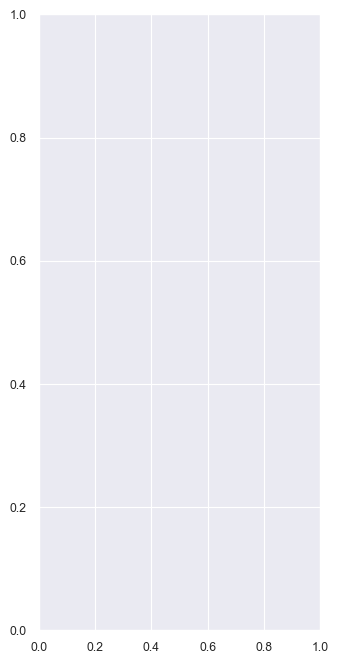

In [130]:
abbr_companies = abbreviations_companies
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

In [132]:
# We select the company and create a subset of the main dataframe

df = flights
carrier = 'AA'
df1 = df[df['AIRLINE']==carrier][['ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY']]
#___________________________________________________________
# I collect the routes and list the delays for each of them
trajet = dict()
for ind, col in df1.iterrows():
    if pd.isnull(col['DEPARTURE_DELAY']): continue
    route = str(col['ORIGIN_AIRPORT'])+'-'+str(col['DESTINATION_AIRPORT'])
    if route in trajet.keys():
        trajet[route].append(col['DEPARTURE_DELAY'])
    else:
        trajet[route] = [col['DEPARTURE_DELAY']]
#____________________________________________________________________        
# I transpose the dictionary in a list to sort the routes by origins        
liste_trajet = []
for key, value in trajet.items():
    liste_trajet.append([key, value])
liste_trajet.sort()

In [133]:
mean_val = [] ; std_val = [] ; x_label = []

i = 0
for route, liste_retards in liste_trajet:
    #_____________________________________________
    # I set the labels as the airport from origin
    index = route.split('-')[0]
    x_label.append(identify_airport[index])
    #______________________________________________________________________________
    # I put a threshold on delays to prevent that high values take too much weight
    trajet2 = [min(90, s) for s in liste_retards]
    #________________________________________
    # I compute mean and standard deviations
    mean_val.append(scipy.mean(trajet2))
    std_val.append(scipy.std(trajet2))
    i += 1
#________________
# Plot the graph
fig, ax = plt.subplots(figsize=(10,4))
std_min = [ min(15 + mean_val[i], s) for i,s in enumerate(std_val)] 
ax.errorbar(list(range(i)), mean_val, yerr = [std_min, std_val], fmt='o') 
ax.set_title('Mean route delays for "{}"'.format(abbr_companies[carrier]),
             fontsize=14, weight = 'bold')
plt.ylabel('Mean delay at origin (minutes)', fontsize=14, weight = 'bold', labelpad=12)
#___________________________________________________
# I define the x,y range and positions of the ticks
imin, imax = 145, 230
plt.xlim(imin, imax) ; plt.ylim(-20, 45)
liste_ticks = [imin]
for j in range(imin+1,imax):
    if x_label[j] == x_label[j-1]: continue
    liste_ticks.append(j)
#_____________________________
# and set the tick parameters  
ax.set_xticks(liste_ticks)
ax.set_xticklabels([x_label[int(x)] for x in ax.get_xticks()], rotation = 90, fontsize = 8)
plt.setp(ax.get_yticklabels(), fontsize=12, rotation = 0)
ax.tick_params(axis='y', which='major', pad=15)

plt.show()

NameError: name 'identify_airport' is not defined

In [34]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 23 columns):
DATE                   object
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
DEPARTURE_TIME         object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
SCHEDULED_TIME         float64
WHEELS_OFF             object
DISTANCE               int64
ELAPSED_TIMES          float64
AIR_TIMES              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      object
WHEELS_ON              object
ARRIVAL_TIME           object
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
dtypes: float64(7), int64(5), object(11)
memory usage: 1.0+ GB


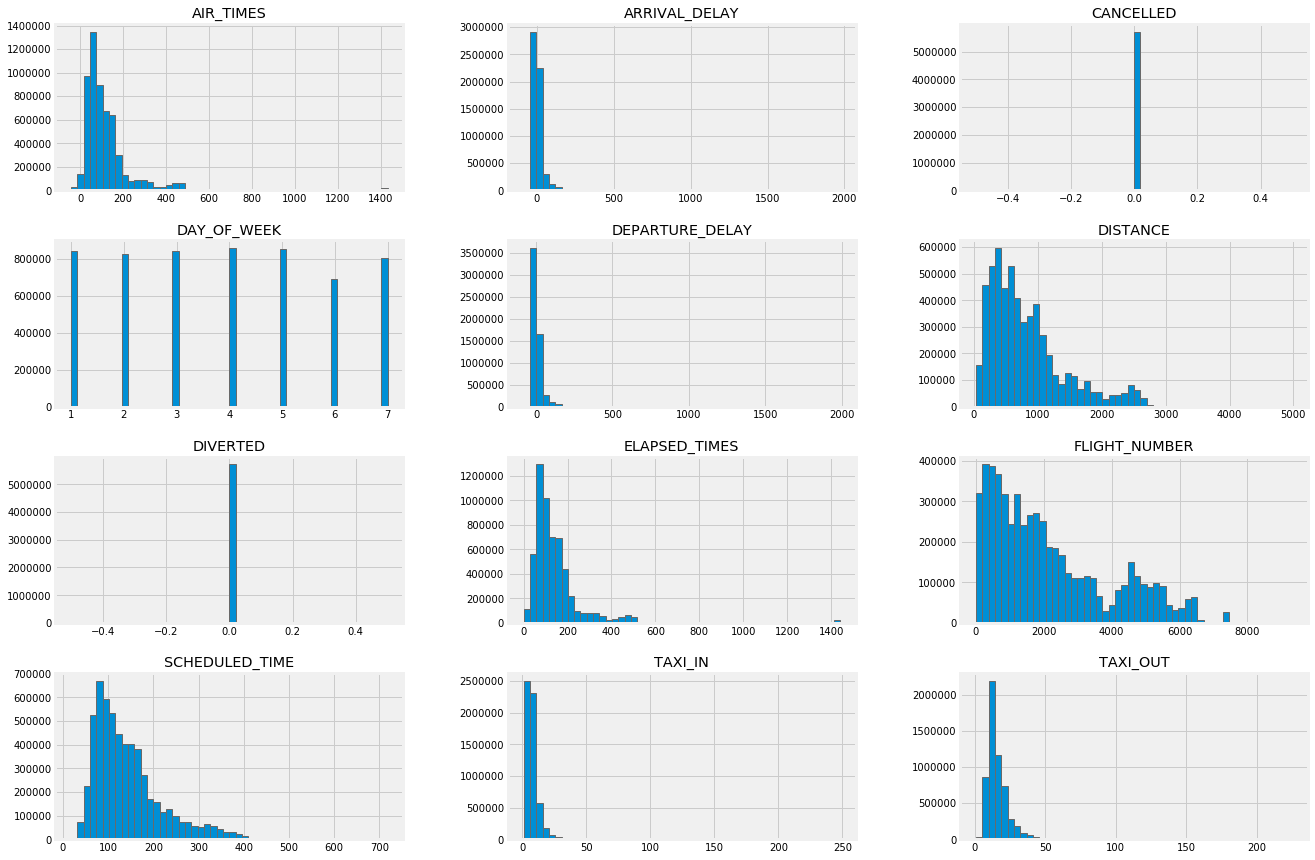

In [35]:
# let's create a histogram for each of these variables so that their dependency 
# is shown
flights.hist(bins=50, figsize=(20, 15))
plt.show()

In [36]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0,0,0


In [87]:
# let's drop the redundant variables diverted and cancelled
# we also don't need the tail number to identify an airline
# 
flights.drop(['DIVERTED', 'CANCELLED', 'TAIL_NUMBER'], axis=1, inplace=True)


In [71]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 21 columns):
Unnamed: 0             int64
DATE                   object
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
DEPARTURE_TIME         object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
SCHEDULED_TIME         float64
WHEELS_OFF             object
DISTANCE               int64
ELAPSED_TIMES          float64
AIR_TIMES              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      object
WHEELS_ON              object
ARRIVAL_TIME           object
ARRIVAL_DELAY          float64
dtypes: float64(7), int64(4), object(10)
memory usage: 915.5+ MB


In [86]:
# the flight number feature doesn't provide any additional details, hence,
# we can remove that as well
flights.drop(['FLIGHT_NUMBER'], axis=1, inplace=True)

In [73]:
flights.head()

,Unnamed: 0,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY
0,0,2015-01-01 00:00:00,4,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0
1,1,2015-01-01 00:00:00,4,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0
2,2,2015-01-01 00:00:00,4,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0
3,3,2015-01-01 00:00:00,4,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0
4,4,2015-01-01 00:00:00,4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0


In [51]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5714008 entries, 0 to 5819078
Data columns (total 19 columns):
DATE                   object
DAY_OF_WEEK            int64
AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
DEPARTURE_TIME         object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
SCHEDULED_TIME         float64
WHEELS_OFF             object
DISTANCE               int64
ELAPSED_TIMES          float64
AIR_TIMES              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      object
WHEELS_ON              object
ARRIVAL_TIME           object
ARRIVAL_DELAY          float64
dtypes: float64(7), int64(2), object(10)
memory usage: 871.9+ MB


In [42]:
flights.describe()

,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,ARRIVAL_DELAY
count,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06,5.714008e+06
mean,3.932643e+00,9.294842e+00,1.606550e+01,1.418940e+02,8.244569e+02,1.427152e+02,1.192207e+02,7.429063e+00,4.407057e+00
std,1.985967e+00,3.688972e+01,8.882449e+00,7.531400e+01,6.086620e+02,1.264533e+02,1.258069e+02,5.618951e+00,3.927130e+01
min,1.000000e+00,-8.200000e+01,1.000000e+00,1.800000e+01,3.100000e+01,0.000000e+00,-4.200000e+01,1.000000e+00,-8.700000e+01
25%,2.000000e+00,-5.000000e+00,1.100000e+01,8.500000e+01,3.730000e+02,7.500000e+01,5.300000e+01,4.000000e+00,-1.300000e+01
50%,4.000000e+00,-2.000000e+00,1.400000e+01,1.230000e+02,6.500000e+02,1.110000e+02,8.600000e+01,6.000000e+00,-5.000000e+00
75%,6.000000e+00,7.000000e+00,1.900000e+01,1.740000e+02,1.065000e+03,1.680000e+02,1.430000e+02,9.000000e+00,8.000000e+00
max,7.000000e+00,1.988000e+03,2.250000e+02,7.180000e+02,4.983000e+03,1.439000e+03,1.431000e+03,2.480000e+02,1.971000e+03


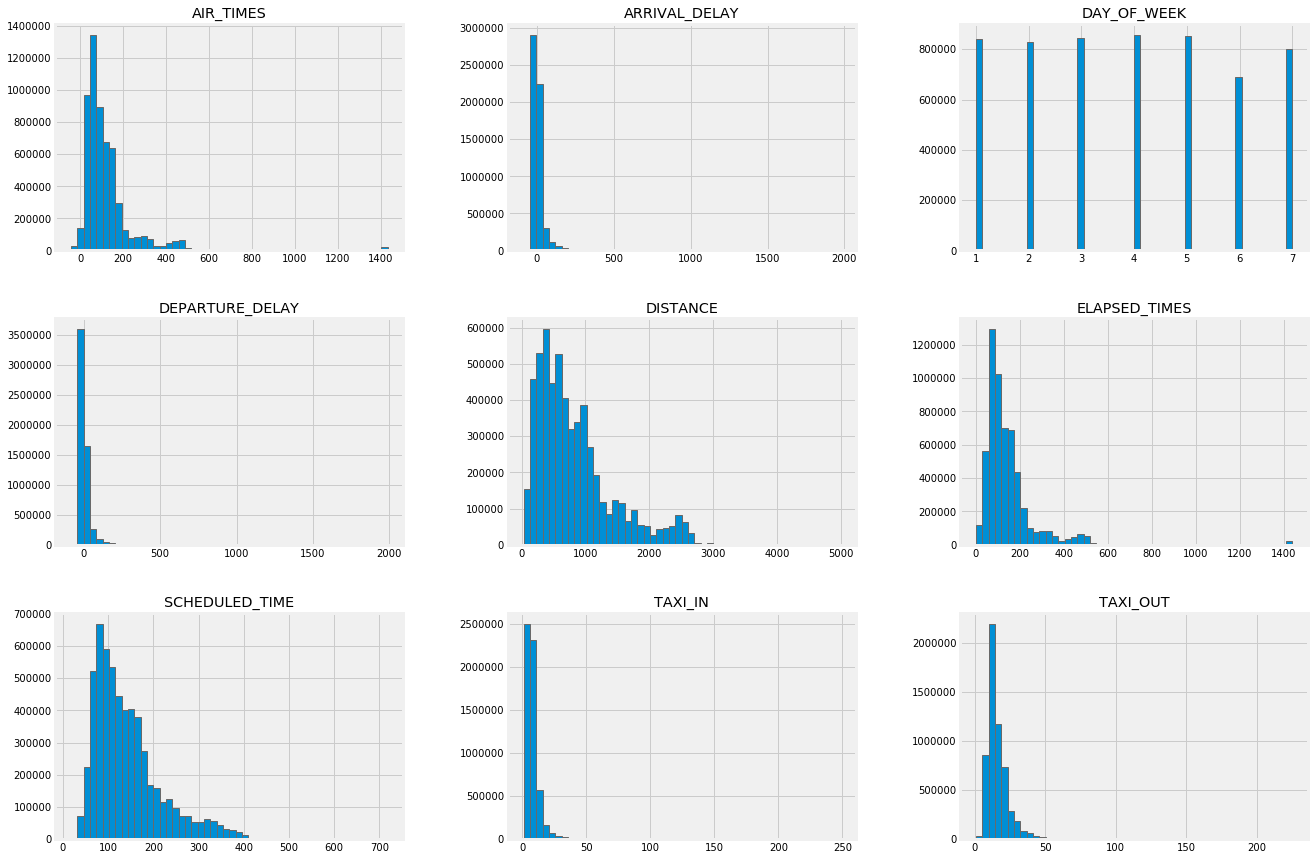

In [43]:
# let's create a histogram now 
flights.hist(bins=50, figsize=(20, 15))
plt.show()

In [45]:
airports = pd.read_csv('datasets/airports.csv')
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
IATA_CODE    322 non-null object
AIRPORT      322 non-null object
CITY         322 non-null object
STATE        322 non-null object
COUNTRY      322 non-null object
LATITUDE     319 non-null float64
LONGITUDE    319 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [46]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [48]:
airlines = pd.read_csv('datasets/airlines.csv')
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [49]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
IATA_CODE    14 non-null object
AIRLINE      14 non-null object
dtypes: object(2)
memory usage: 352.0+ bytes


In [52]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01 00:00:00,4,AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0
1,2015-01-01 00:00:00,4,AA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0
2,2015-01-01 00:00:00,4,US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0
3,2015-01-01 00:00:00,4,AA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0
4,2015-01-01 00:00:00,4,AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0


In [5]:
# let's encode each of the airlines
# using label encoder to encode the airlines
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

flights['AIRLINE'] = encoder.fit_transform(flights['AIRLINE'])
flights.head()

,Unnamed: 0,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,0,2015-01-01 00:00:00,4,1,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0,0,0
1,1,2015-01-01 00:00:00,4,0,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0,0,0
2,2,2015-01-01 00:00:00,4,11,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0,0,0
3,3,2015-01-01 00:00:00,4,0,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0,0,0
4,4,2015-01-01 00:00:00,4,1,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0,0,0


In [6]:
flights['AIRLINE'] = encoder.inverse_transform(flights['AIRLINE'])
flights.head()

,Unnamed: 0,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0,0,0
1,1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0,0,0
2,2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0,0,0
3,3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0,0,0
4,4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0,0,0


In [54]:
# let's encode each of the airports IATA_CODE
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [59]:
encoder_airports = LabelEncoder()
airport_names = airports['IATA_CODE'].tolist()
airport_dict = {}
for index, name in enumerate(airport_names):
    airport_dict[index] = name


'AEX'

In [77]:
# replace origin airports and destination airports with their respective codes
origins = flights['ORIGIN_AIRPORT'].tolist()
dests = flights['DESTINATION_AIRPORT'].tolist()

origin_x, dest_x = [], []
for origin, dest in zip(origins, dests):
    for index, name in airport_dict.items():
        if name == origin:
            origin_x.append(index)
            break
    for index, name in airport_dict.items():
        if name == dest:
            dest_x.append(index)
            break
origin_x[:10]

[17, 176, 278, 176, 277, 278, 174, 176, 278, 174]

In [81]:
flights.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], axis=1, inplace=True)
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01 00:00:00,4,1,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0
1,2015-01-01 00:00:00,4,0,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0
2,2015-01-01 00:00:00,4,11,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0
3,2015-01-01 00:00:00,4,0,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0
4,2015-01-01 00:00:00,4,1,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0


In [62]:
flights.insert(loc=3, column='ORIGIN_AIRPORT', value=origin_x)
flights.insert(loc=4, column='DESTINATION_AIRPORT', value=dest_x)
flights.head()

ValueError: Length of values does not match length of index

In [78]:
len(dest_x)

5231130

In [79]:
flights.shape

(5714008, 19)

In [83]:
flights = pd.read_csv('updated_flights.csv')

In [89]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01 00:00:00,4,1,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0
1,2015-01-01 00:00:00,4,0,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0
2,2015-01-01 00:00:00,4,11,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0
3,2015-01-01 00:00:00,4,0,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0
4,2015-01-01 00:00:00,4,1,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0


In [85]:
flights.drop(['Unnamed: 0'], axis=1, inplace=True)
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015-01-01 00:00:00,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0,0,0
1,2015-01-01 00:00:00,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0,0,0
2,2015-01-01 00:00:00,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0,0,0
3,2015-01-01 00:00:00,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0,0,0
4,2015-01-01 00:00:00,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0,0,0


In [90]:
encoder = LabelEncoder()

flights['ORIGIN_AIRPORT'] = encoder.fit_transform(list(flights['ORIGIN_AIRPORT']))
flights['DESTINATION_AIRPORT'] = encoder.fit_transform(list(flights['DESTINATION_AIRPORT']))
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01 00:00:00,4,1,323,584,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0
1,2015-01-01 00:00:00,4,0,482,542,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0
2,2015-01-01 00:00:00,4,11,584,373,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0
3,2015-01-01 00:00:00,4,0,482,510,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0
4,2015-01-01 00:00:00,4,1,583,324,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0


In [91]:
# unsufficient statistics
# finding the number of flights that left each airport

carrier = 0
check_airports = flights[(flights['AIRLINE'] == carrier)]['DEPARTURE_DELAY'].groupby(
                         flights['ORIGIN_AIRPORT']).apply(get_stats).unstack()
check_airports.sort_values('count', ascending = False, inplace = True)
check_airports[-5:]

,min,max,count,mean
ORIGIN_AIRPORT,,,,
263,-10.0,88.0,26.0,7.461538
625,-13.0,2.0,18.0,-7.055556
152,-7.0,18.0,9.0,-2.000000
491,-5.0,74.0,9.0,12.555556
91,-15.0,-5.0,4.0,-8.500000


In [92]:
# from this we can see that the less visited airports 
# have only a few flights in a month.
# thus in least favourable case, it's impossible to perform an LR

# extreme delays
# sometimes extreme delays serve as outliers and we need to remove them as well

def get_flight_delays(df, carrier, id_airport, extrem_values = False):
    df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
    #_______________________________________
    # remove extreme values before fitting
    if extrem_values:
        df2['DEPARTURE_DELAY'] = df2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df2.dropna(how = 'any')
    #__________________________________
    # Conversion: date + heure -> heure
    df2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    #___________________________________________________________________
    # regroupement des vols par heure de départ et calcul de la moyenne
    test2 = df2['DEPARTURE_DELAY'].groupby(df2['heure_depart']).apply(get_stats).unstack()
    test2.reset_index(inplace=True)
    #___________________________________
    # conversion de l'heure en secondes
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    test2.reset_index(inplace=True)
    test2['heure_depart_min'] = test2['heure_depart'].apply(fct)
    return test2

In [104]:
df_train = flights[flights['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2015, 1, 23)]
df_test  = flights[flights['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2015, 1, 23)]
df = df_train

In [94]:
type(flights['SCHEDULED_DEPARTURE'][0])

str

In [101]:
def str_date(str_):
    date_ = datetime.datetime.strptime(str_, '%Y-%m-%d %H:%M:%S')
    return date_

In [102]:
flights['SCHEDULED_DEPARTURE'] = flights['SCHEDULED_DEPARTURE'].apply(str_date)

In [105]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 19 columns):
DATE                   object
DAY_OF_WEEK            int64
AIRLINE                int32
ORIGIN_AIRPORT         int64
DESTINATION_AIRPORT    int64
SCHEDULED_DEPARTURE    datetime64[ns]
DEPARTURE_TIME         object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
SCHEDULED_TIME         float64
WHEELS_OFF             object
DISTANCE               int64
ELAPSED_TIMES          float64
AIR_TIMES              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      object
WHEELS_ON              object
ARRIVAL_TIME           object
ARRIVAL_DELAY          float64
dtypes: datetime64[ns](1), float64(7), int32(1), int64(4), object(6)
memory usage: 806.5+ MB


In [106]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01 00:00:00,4,1,323,584,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0
1,2015-01-01 00:00:00,4,0,482,542,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0
2,2015-01-01 00:00:00,4,11,584,373,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0
3,2015-01-01 00:00:00,4,0,482,510,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0
4,2015-01-01 00:00:00,4,1,583,324,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0


In [108]:
def linear_regression(test2):
    test = test2[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
    X = np.array(test['heure_depart_min'])
    Y = np.array(test['mean'])
    X = X.reshape(len(X),1)
    Y = Y.reshape(len(Y),1)
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    result = regr.predict(X)
    return X, Y, result

In [119]:
id_airport = 482
carrier = 0
df2 = df[(df['AIRLINE'] == carrier) & (df['ORIGIN_AIRPORT'] == id_airport)]
df2['heure_depart'] =  df2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
df2['heure_depart'] = df2['heure_depart'].apply(lambda x:x.hour*3600+x.minute*60+x.second)
#___________________
# first case
test2 = get_flight_delays(df, carrier, id_airport, False)
X1, Y1, result2 = linear_regression(test2)
#___________________
# second case
test3 = get_flight_delays(flights, carrier, id_airport, True)
X2, Y2, result3 = linear_regression(test3)

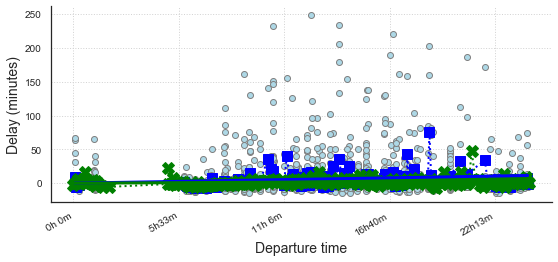

In [120]:
fig1 = Figure_style(8, 4, 1, 1)
fig1.pos_update(0, 0)
fig1.cust_scatter(df2['heure_depart'], df2['DEPARTURE_DELAY'], markeredge = True)
fig1.cust_plot(X1, Y1, color = 'b', linestyle = ':', linewidth = 2, marker = ('b','s', 10))
fig1.cust_plot(X2, Y2, color = 'g', linestyle = ':', linewidth = 2, marker = ('g','X', 12))
fig1.cust_plot(X1, result2, color = 'b', linewidth = 3)
fig1.cust_plot(X2, result3, color = 'g', linewidth = 3)
fig1.style()
fig1.set_ylabel('Delay (minutes)', fontsize = 14)
fig1.set_xlabel('Departure time', fontsize = 14)
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

In [111]:
class Figure_style():
    #_________________________________________________________________
    def __init__(self, size_x = 11, size_y = 5, nrows = 1, ncols = 1):
        sns.set_style("white")
        sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
        self.fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(size_x,size_y,))
        #________________________________
        # convert self.axs to 2D array
        if nrows == 1 and ncols == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif nrows == 1:
            self.axs = np.reshape(axs, (1, -1))
        elif ncols == 1:
            self.axs = np.reshape(axs, (-1, 1))
    #_____________________________
    def pos_update(self, ix, iy):
        self.ix, self.iy = ix, iy
    #_______________
    def style(self):
        self.axs[self.ix, self.iy].spines['right'].set_visible(False)
        self.axs[self.ix, self.iy].spines['top'].set_visible(False)
        self.axs[self.ix, self.iy].yaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].xaxis.grid(color='lightgray', linestyle=':')
        self.axs[self.ix, self.iy].tick_params(axis='both', which='major',
                                               labelsize=10, size = 5)
    #________________________________________
    def draw_legend(self, location='upper right'):
        legend = self.axs[self.ix, self.iy].legend(loc = location, shadow=True,
                                        facecolor = 'g', frameon = True)
        legend.get_frame().set_facecolor('whitesmoke')
    #_________________________________________________________________________________
    def cust_plot(self, x, y, color='b', linestyle='-', linewidth=1, marker=None, label=''):
        if marker:
            markerfacecolor, marker, markersize = marker[:]
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                linewidth = linewidth, marker = marker, label = label,
                                markerfacecolor = markerfacecolor, markersize = markersize)
        else:
            self.axs[self.ix, self.iy].plot(x, y, color = color, linestyle = linestyle,
                                        linewidth = linewidth, label=label)
        self.fig.autofmt_xdate()
    #________________________________________________________________________
    def cust_plot_date(self, x, y, color='lightblue', linestyle='-',
                       linewidth=1, markeredge=False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].plot_date(x, y, color='lightblue', markeredgecolor='grey',
                                  markeredgewidth = markeredgewidth, label=label)
    #________________________________________________________________________
    def cust_scatter(self, x, y, color = 'lightblue', markeredge = False, label=''):
        markeredgewidth = 1 if markeredge else 0
        self.axs[self.ix, self.iy].scatter(x, y, color=color,  edgecolor='grey',
                                  linewidths = markeredgewidth, label=label)    
    #___________________________________________
    def set_xlabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_xlabel(label, fontsize = fontsize)
    #___________________________________________
    def set_ylabel(self, label, fontsize = 14):
        self.axs[self.ix, self.iy].set_ylabel(label, fontsize = fontsize)
    #____________________________________
    def set_xlim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_xlim([lim_inf, lim_sup])
    #____________________________________
    def set_ylim(self, lim_inf, lim_sup):
        self.axs[self.ix, self.iy].set_ylim([lim_inf, lim_sup])  

In [121]:
# doing the polynomial degree
class fit_polynome:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)

    def split(self, method):        
        self.method = method        
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

        if method == 'all':
            self.X_train = self.X
            self.Y_train = self.Y
            self.X_test  = self.X
            self.Y_test  = self.Y                        
        elif method == 'split':            
            self.X_train, self.X_test, self.Y_train, self.Y_test = \
                train_test_split(self.X, self.Y, test_size=0.3)
    
    def train(self, pol_order):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X_train)
        self.regr.fit(self.X_, self.Y_train)
    
    def predict(self, X):
        self.X_ = self.poly.fit_transform(X)
        self.result = self.regr.predict(self.X_)
    
    def calc_score(self):        
        X_ = self.poly.fit_transform(self.X_test)
        result = self.regr.predict(X_)
        self.score = metrics.mean_squared_error(result, self.Y_test)

modèle nº1 , min. pour n = 3, score = 14.7
modèle nº2 , min. pour n = 1, score = 12.1
modèle nº3 , min. pour n = 2, score = 14.9


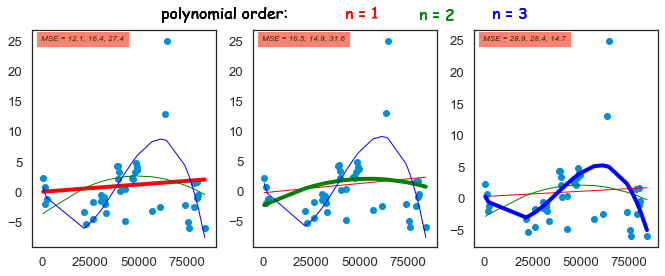

In [125]:

fig = plt.figure(1, figsize=(10,4))

ax = ['_' for _ in range(4)]
ax[1]=fig.add_subplot(131) 
ax[2]=fig.add_subplot(132) 
ax[3]=fig.add_subplot(133) 

id_airport = 584
carrier = 11
test2 = get_flight_delays(flights, carrier, id_airport, True)

result = ['_' for _ in range(4)]
score = [10000 for _ in range(4)]
found = [False for _ in range(4)]
fit = fit_polynome(test2)

color = '.rgbyc'

inc = 0
while True:
    inc += 1
    fit.split('split')
    for i in range(1,4):
        fit.train(pol_order = i)
        fit.predict(fit.X)
        result[i] = fit.result
        fit.calc_score()
        score[i]  = fit.score

    [ind_min] = [j for j,val in enumerate(score) if min(score) == val]
    print("modèle nº{:<2}, min. pour n = {}, score = {:.1f}".format(inc, ind_min,score[ind_min]))
    
    if not found[ind_min]:            
        for i in range(1,4):
            ax[ind_min].plot(fit.X, result[i], color[i], linewidth = 4 if i == ind_min else 1)
        ax[ind_min].scatter(fit.X, fit.Y)                
        ax[ind_min].text(0.05, 0.95, 'MSE = {:.1f}, {:.1f}, {:.1f}'.format(*score[1:4]),
                         style='italic', transform=ax[ind_min].transAxes, fontsize = 8,
                         bbox={'facecolor':'tomato', 'alpha':0.8, 'pad':5})                
        found[ind_min] = True

    shift = 0.5
    plt.text(-1+shift, 1.05, "polynomial order:", color = 'k',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0+shift, 1.05, "n = 1", color = 'r', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.4+shift, 1.05, "n = 2", color = 'g', 
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
    plt.text(0.8+shift, 1.05, "n = 3", color = 'b',
                transform=ax[2].transAxes, fontsize = 16, family='fantasy')
   
    if inc == 40 or all(found[1:4]): break

In [124]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01 00:00:00,4,1,323,584,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0
1,2015-01-01 00:00:00,4,0,482,542,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0
2,2015-01-01 00:00:00,4,11,584,373,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0
3,2015-01-01 00:00:00,4,0,482,510,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0
4,2015-01-01 00:00:00,4,1,583,324,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0


In [128]:
class fit_polynome_cv:

    def __init__(self, data):
        self.data = data[['mean', 'heure_depart_min']].dropna(how='any', axis = 0)
        self.X = np.array(self.data['heure_depart_min'])
        self.Y = np.array(self.data['mean'])
        self.X = self.X.reshape(len(self.X),1)
        self.Y = self.Y.reshape(len(self.Y),1)

    def train(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.result = cross_val_predict(self.regr, self.X_, self.Y, cv = nb_folds)
    
    def calc_score(self, pol_order, nb_folds):
        self.poly = PolynomialFeatures(degree = pol_order)
        self.regr = linear_model.LinearRegression()
        self.X_ = self.poly.fit_transform(self.X)
        self.score = np.mean(cross_val_score(self.regr, self.X_, self.Y,
                                             cv = nb_folds, scoring = 'neg_mean_squared_error'))

In [129]:

nb_folds = 10
print('Max possible number of folds: {} \n'.format(test2.shape[0]-1))
fit2 = fit_polynome_cv(test2)
for i in range(1, 8):
    fit2.calc_score(i, nb_folds)
    print('n={} -> MSE = {}'.format(i, round(abs(fit2.score),3)))

Max possible number of folds: 39 

n=1 -> MSE = 34.598
n=2 -> MSE = 82.47
n=3 -> MSE = 27.564
n=4 -> MSE = 37.883
n=5 -> MSE = 44.331
n=6 -> MSE = 43.356
n=7 -> MSE = 37.673


In [130]:
fit = fit_polynome(test2)
fit.split('all')
fit.train(pol_order = 2)
fit.predict(fit.X)

In [131]:
fit2.train(pol_order = 2, nb_folds = nb_folds)

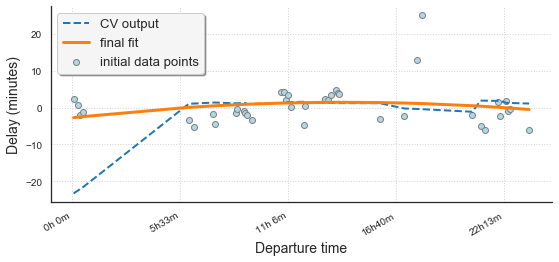

In [132]:
fig1 = Figure_style(8, 4, 1, 1) ; fig1.pos_update(0, 0)
fig1.cust_scatter(fit2.X, fit2.Y, markeredge = True, label = 'initial data points')
fig1.cust_plot(fit.X,fit2.result,color=u'#1f77b4',linestyle='--',linewidth=2,label='CV output')
fig1.cust_plot(fit.X,fit.result,color=u'#ff7f0e',linewidth = 3,label='final fit')
fig1.style(); fig1.draw_legend('upper left')
fig1.set_ylabel('Delay (minutes)') ; fig1.set_xlabel('Departure time')
#____________________________________
# convert and set the x ticks labels
fct_convert = lambda x: (int(x/3600) , int(divmod(x,3600)[1]/60))
fig1.axs[fig1.ix, fig1.iy].set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*fct_convert(x))
                                            for x in fig1.axs[fig1.ix, fig1.iy].get_xticks()]);

In [133]:
score = metrics.mean_squared_error(fit.result, fit2.Y)
score

27.73042243998022

In [134]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 19 columns):
DATE                   object
DAY_OF_WEEK            int64
AIRLINE                int32
ORIGIN_AIRPORT         int64
DESTINATION_AIRPORT    int64
SCHEDULED_DEPARTURE    datetime64[ns]
DEPARTURE_TIME         object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
SCHEDULED_TIME         float64
WHEELS_OFF             object
DISTANCE               int64
ELAPSED_TIMES          float64
AIR_TIMES              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      object
WHEELS_ON              object
ARRIVAL_TIME           object
ARRIVAL_DELAY          float64
dtypes: datetime64[ns](1), float64(7), int32(1), int64(4), object(6)
memory usage: 806.5+ MB


In [135]:
flights.head()

,DATE,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,WHEELS_OFF,DISTANCE,ELAPSED_TIMES,AIR_TIMES,TAXI_IN,SCHEDULED_ARRIVAL,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01 00:00:00,4,1,323,584,2015-01-01 00:05:00,23:54:00,-11.0,21.0,205.0,00:15:00,1448,254.0,229.0,4.0,04:30:00,04:04:00,04:08:00,-22.0
1,2015-01-01 00:00:00,4,0,482,542,2015-01-01 00:10:00,00:02:00,-8.0,12.0,280.0,00:14:00,2330,459.0,443.0,4.0,07:50:00,07:37:00,07:41:00,-9.0
2,2015-01-01 00:00:00,4,11,584,373,2015-01-01 00:20:00,00:18:00,-2.0,16.0,286.0,00:34:00,2296,473.0,446.0,11.0,08:06:00,08:00:00,08:11:00,5.0
3,2015-01-01 00:00:00,4,0,482,510,2015-01-01 00:20:00,00:15:00,-5.0,15.0,285.0,00:30:00,2342,461.0,438.0,8.0,08:05:00,07:48:00,07:56:00,-9.0
4,2015-01-01 00:00:00,4,1,583,324,2015-01-01 00:25:00,00:24:00,-1.0,11.0,235.0,00:35:00,1448,155.0,139.0,5.0,03:20:00,02:54:00,02:59:00,-21.0


In [136]:
flights.to_csv('eda_flights.csv')

In [137]:
# do the training and prediction tomorrow